# "Microsoft Studios:"
>### _How should Microsoft Enter the Movie Business?_
>##### __G. Haws & K. Hayes__
>###### July 31, 2019
***
>*Sources:\
TheMovieDB.org\
Box Office Mojo\
IMBD*

### Questions to Consider:

>### - In order to maximize its investment, what scale of films should Microsoft produce?
>### - What types of studios should Microsoft emulate?
>### - Which directors should Microsoft seek?

### Step One: Import the Tools...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Microsoft_Clean import *
from Microsoft_Dataviz import *

### Step Two: Import the Data...

In [2]:
tn_budget = pd.read_csv('Data/Zipped_Data/tn.movie_budgets.csv.gz',\
                        compression='gzip')
bom_gross = pd.read_csv('Data/Zipped_Data/bom.movie_gross.csv.gz',\
                        compression='gzip')
imbd_basics = pd.read_csv('Data/Zipped_Data/imdb.title.basics.csv.gz',\
                          compression='gzip')
imbd_name = pd.read_csv('Data/Zipped_Data/imdb.name.basics.csv.gz',\
                        compression='gzip')
imbd_principals = pd.read_csv('Data/Zipped_Data/imdb.title.principals.csv.gz',\
                              compression='gzip')

### Step Three: Clean the Data...
>_* N.B. - the below is an abstraction; the actual cleaing process is rather lengthy..._  
>                 _...this code takes in a list of dataframes and condenses them into one:_

In [3]:
md_clean = Clean_Data(tn_budget, bom_gross, imbd_basics, imbd_name, imbd_principals)

### Step Four: Data Visualizations (i.e. exploratory data analysis)...

Something here ...

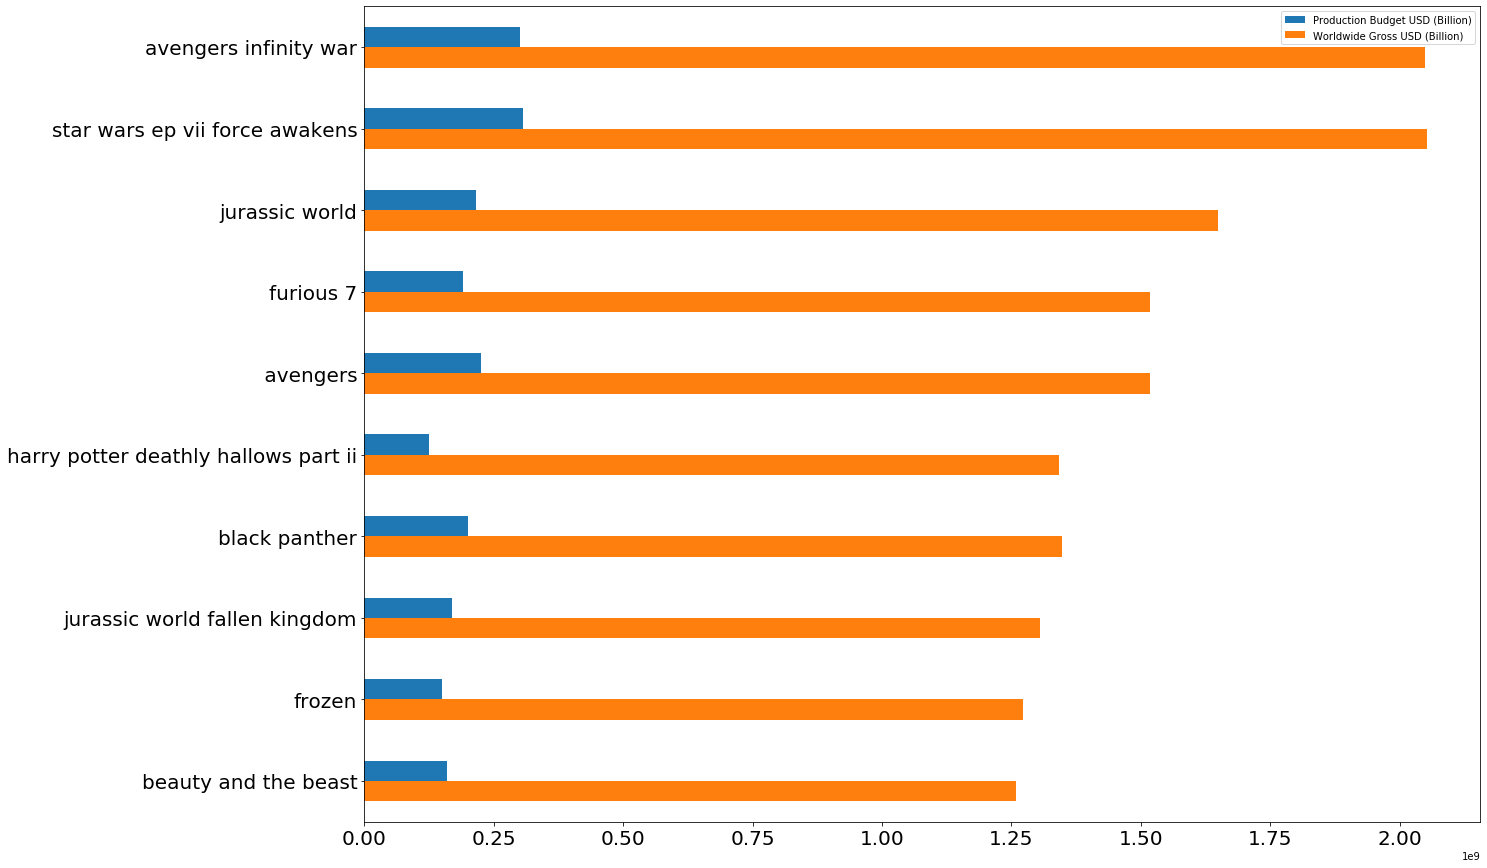

In [4]:
# Take top net profit values:
top_net = take_top_values_descending(md_clean, 'net', 10)

# Prepare our data series:
index = cast_to_list(top_net, 'title')
production_budget = cast_to_list(top_net, 'production_budget')
worldwide_gross = cast_to_list(top_net, 'worldwide_gross')

# Plot our bar chart:
df = pd.DataFrame({'Production Budget USD (Billion)':
                   production_budget,
                   'Worldwide Gross USD (Billion)':
                   worldwide_gross}, index=index)
ax = df.plot.barh(figsize=(20, 15), rot=0, fontsize=20).invert_yaxis()

Something else here...

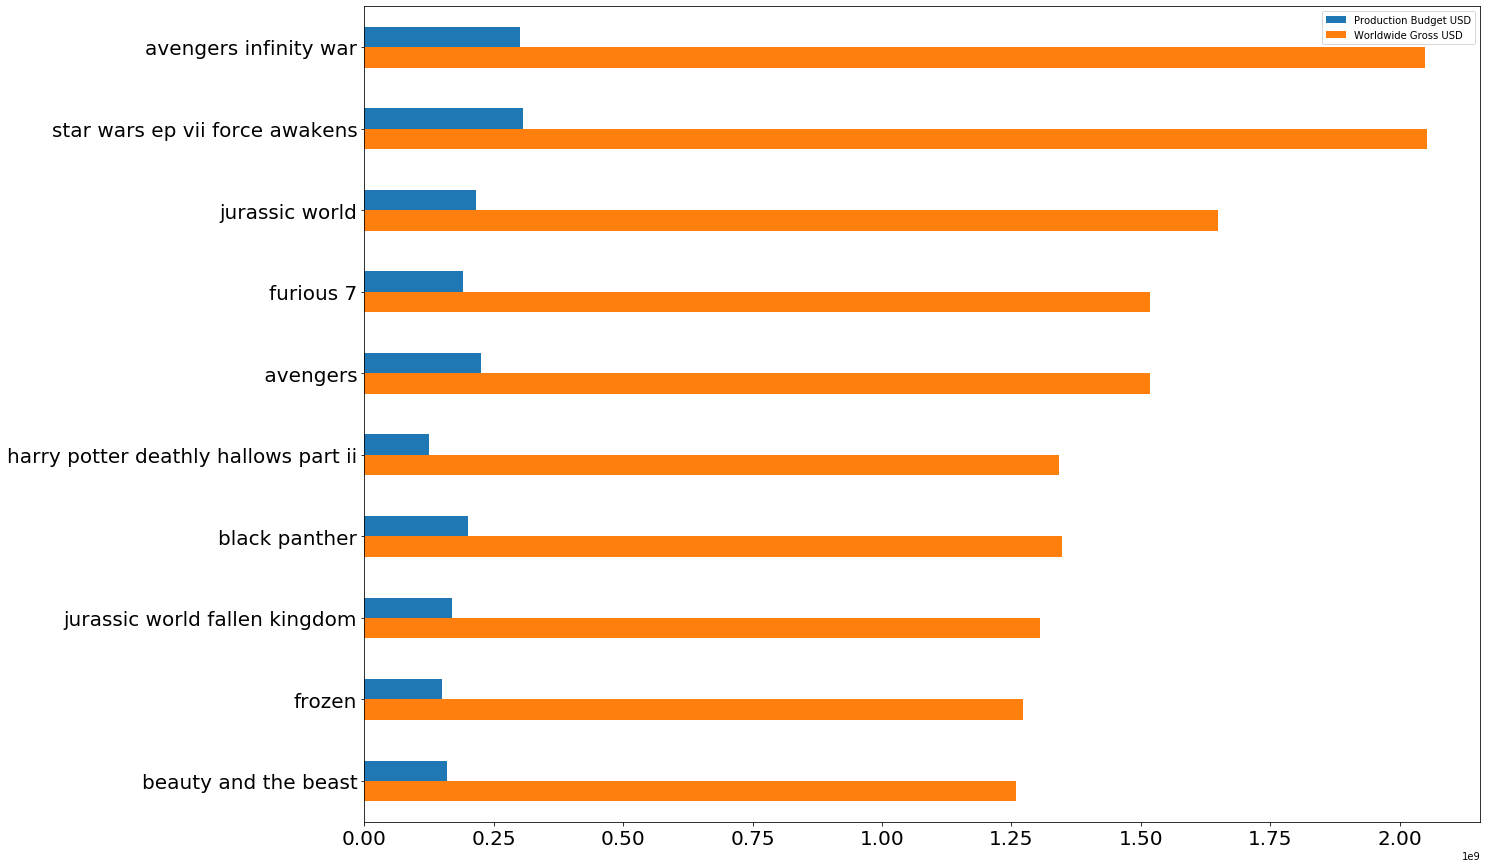

In [5]:
# Take top net profit values:
top_ratio = take_top_values_descending(md_clean, 'ratio', 10)

# Prepare our data series:
index = cast_to_list(top_net, 'title')
production_budget = cast_to_list(top_net, 'production_budget')
worldwide_gross = cast_to_list(top_net, 'worldwide_gross')

# ... and plot our bar chart:
df = pd.DataFrame({'Production Budget USD':
                   production_budget,
                   'Worldwide Gross USD':
                   worldwide_gross}, index=index,)
ax = df.plot.barh(figsize=(20, 15), rot=0, fontsize=20).invert_yaxis()

Something here:

In [6]:
# Creates a graph of the 20 studios with the best ROI
studio_ratio_mean = take_top_mean_descending(md_clean, 'studio', 'ratio', 0, 20)

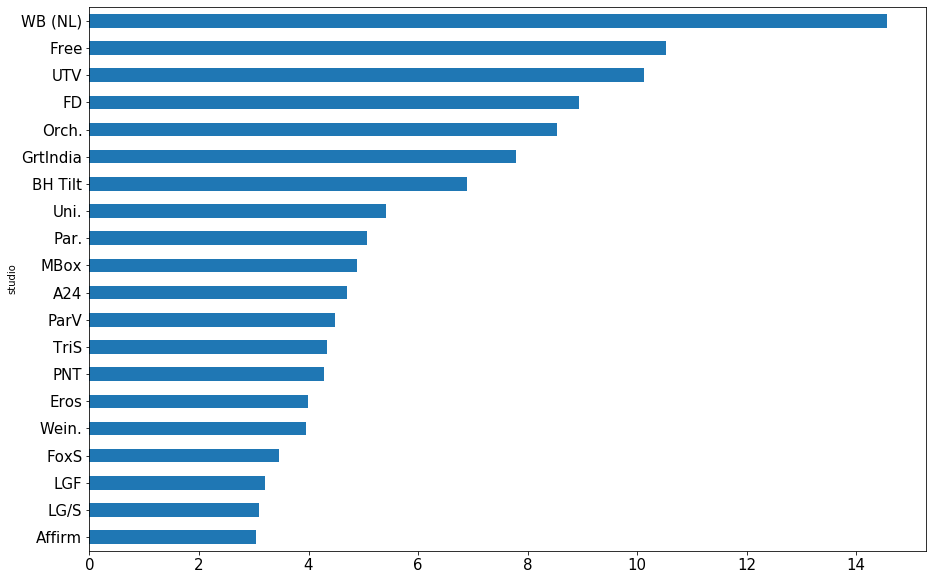

In [7]:
# ...and plot it!
studio_ratio_mean.plot(kind='barh',
                       figsize=(15, 10), fontsize=15).invert_yaxis()

Something...

In [8]:
# Creates a graph of the top 20 directors (discarding outliers) with the best ROI
director_ratio_mean = take_top_mean_descending(md_clean, 'director', 'ratio', 1, 21)

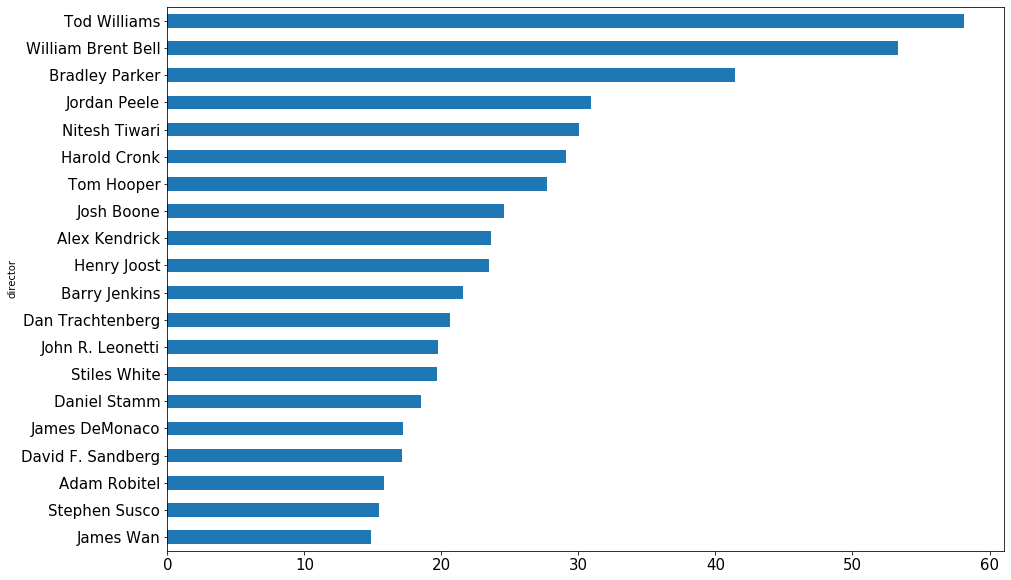

In [9]:
# ...and plot it!
director_ratio_mean.plot(kind='barh',
                       figsize=(15, 10), fontsize=15).invert_yaxis()

Something...

In [10]:
# Provides a count for the number of films made by each director with a top-20 ROI:
directors_roi_count = two_col_pivot_table_mean_nunique(md_clean, 'director', 'ratio', 'title', 0, 20)

([<matplotlib.axis.XTick at 0x7f1a73fe1550>,
 <a list of 4 Text xticklabel objects>)

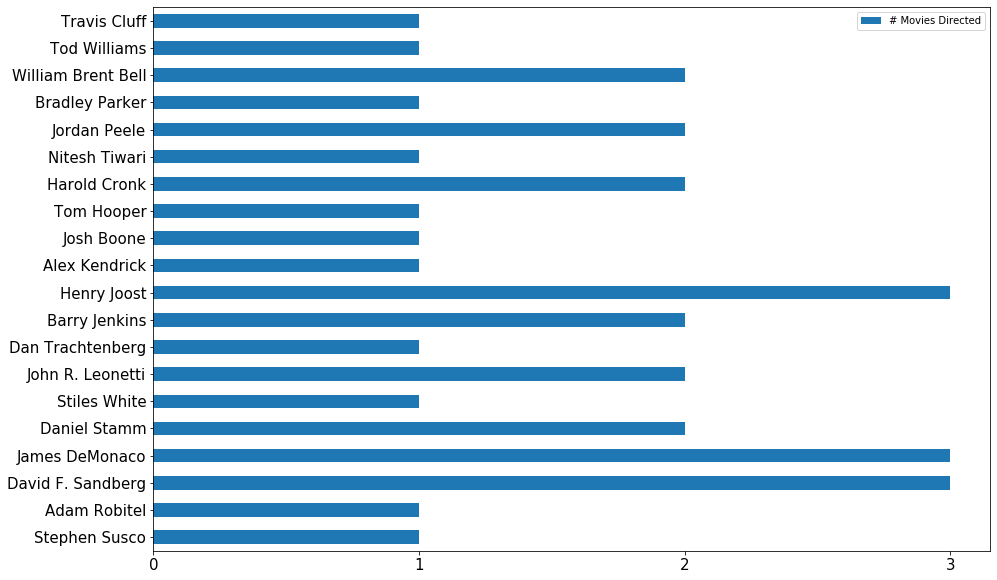

In [11]:
# Prepare our data series:
index = cast_to_list(directors_roi_count, 'director')
title_count = cast_to_list(directors_roi_count, 'title')

#Plot our bar chart:
df = pd.DataFrame({'# Movies Directed': title_count},
                  index=index)
ax = df.plot.barh(figsize=(15, 10), rot=0, fontsize=15).invert_yaxis()
plt.xticks(np.arange(0, 4, 1))

Something else to conclude...

### Recommendations:

>##### - Instead of focusing on overall returns, focus on ROI.
>##### - Model operations on studios capable of producing films that maximize ROI.
>##### - Hire directors that can creating engaging films, despite heavy budgetary constraints.
>##### - Hire new directors.